In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
import gdal
import rasterio
import ee
import json

In [2]:
with open('LC08_L1TP_130049_20180119_20200902_02_T1_MTL.json', 'r') as f:
    data = json.load(f)
    for i in data['LANDSAT_METADATA_FILE']:
        print(i)

PRODUCT_CONTENTS
IMAGE_ATTRIBUTES
PROJECTION_ATTRIBUTES
LEVEL1_PROCESSING_RECORD
LEVEL1_MIN_MAX_RADIANCE
LEVEL1_MIN_MAX_REFLECTANCE
LEVEL1_MIN_MAX_PIXEL_VALUE
LEVEL1_RADIOMETRIC_RESCALING
LEVEL1_THERMAL_CONSTANTS
LEVEL1_PROJECTION_PARAMETERS


In [3]:

#Conversion to TOA Reflectance
tiff_file = "A:/5-TOA/LC08_L1TP_130049_20180119_20200902_02_T1/LC08_L1TP_130049_20180119_20200902_02_T1_B5.TIF" #test band 5
dt_reader = rasterio.open(tiff_file)
DN = dt_reader.read(1)

Reflec_mult_band_x  = float(data['LANDSAT_METADATA_FILE']['LEVEL1_RADIOMETRIC_RESCALING']['REFLECTANCE_MULT_BAND_5']) #band 5
# mtl_src = 
Reflec_add_band_x = float(data['LANDSAT_METADATA_FILE']['LEVEL1_RADIOMETRIC_RESCALING']['REFLECTANCE_ADD_BAND_5']) #band 5
#set angle
sun_ele_angle_degree = float(data['LANDSAT_METADATA_FILE']['IMAGE_ATTRIBUTES']['SUN_ELEVATION'])
sun_ele_angle_radain = (sun_ele_angle_degree)* (math.pi/180)

zenith_angle_degree = 90 - sun_ele_angle_degree
zenith_angle_Radain = (zenith_angle_degree) * (math.pi/180)

#TOA planetary reflectance, without correction for solar angle
toa_re_no_solar_angle = ( Reflec_mult_band_x * DN) - Reflec_add_band_x # ρλ′= (Mρ*Qcal)+Aρ
#TOA planetary reflectance
TOA_Reflec_cos = toa_re_no_solar_angle / math.cos(zenith_angle_Radain) # ρλ= (ρλ′ / cos(θSZ))  Note ' cos(θSZ) in radian'  
TOA_Reflec_sin = toa_re_no_solar_angle / math.sin(sun_ele_angle_radain) # ρλ= (ρλ′ / sin(θSZ))  Note ' sin(θSZ) in radian' 


In [4]:
np.sum(TOA_Reflec_sin-TOA_Reflec_cos) #has an error in e-09

3.97612226477051e-09

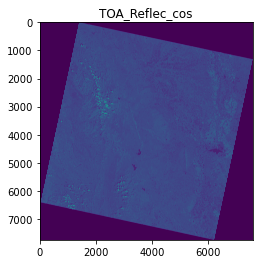

In [5]:
plt.title('TOA_Reflec_cos')
plt.imshow(TOA_Reflec_cos)
plt.show()

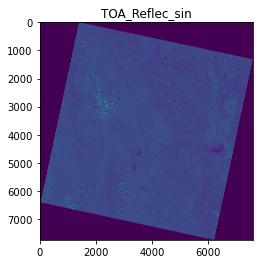

In [6]:
plt.title('TOA_Reflec_sin')
plt.imshow(TOA_Reflec_sin)
plt.show()